# Linear Regression

In [53]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [54]:
def synthetic_data(w, b, num_samples):
  X = torch.normal(0, 1, (num_samples, len(w)))
  y = torch.matmul(X, w) + b
  y += torch.normal(0, 1, y.shape)
  return X, y.reshape((-1, 1))

In [55]:
true_w = torch.tensor([1.3])
true_b = 3.7
num_samples = 10000
features, labels = synthetic_data(true_w, true_b, num_samples)

In [56]:
batch_size = 10
data_iter = torch.utils.data.DataLoader(
                torch.utils.data.TensorDataset(features, labels), 
                batch_size, 
                shuffle=True)

In [57]:
num_inputs = len(true_w)
num_outputs = 1

model = torch.nn.Sequential(torch.nn.Linear(num_inputs, num_outputs))

In [58]:
loss = torch.nn.MSELoss()

In [59]:
learning_rate = 0.3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [60]:
num_epochs = 10
for epoch in range(num_epochs):
  for X, y in data_iter:
    l = loss(model(X), y)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

  l = loss(model(features), labels)
  print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 1.114276
epoch 2, loss 1.145551
epoch 3, loss 1.306425
epoch 4, loss 1.076268
epoch 5, loss 1.080043
epoch 6, loss 1.171625
epoch 7, loss 1.081527
epoch 8, loss 1.094823
epoch 9, loss 1.250294
epoch 10, loss 1.295697


In [61]:
w = model[0].weight.data
print('error in estimating w: ', true_w - w.reshape(true_w.shape))

b = model[0].bias.data
print('error in estimating b: ', true_b - b)

error in estimating w:  tensor([-0.3530])
error in estimating b:  tensor([-0.3979])


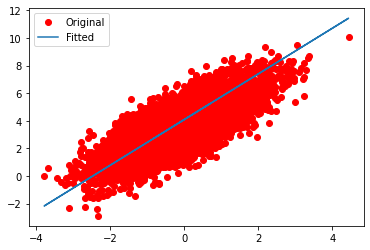

In [62]:
predicted = model(features).detach().numpy()
plt.plot(features, labels, 'ro', label='Original')
plt.plot(features, predicted, label='Fitted')
plt.legend()
plt.show()

In [63]:
torch.save(model.state_dict(), 'linear_reg.ckpt')